# Classical Time Series Models AR,MA,ARMA,ARIMA

# Worked on it on 24 Aug 2021

# total 5 models

1. AR(Auto Regression)
2. MA(Moving Average)
3. ARMA
4. ARIMA

# 1. Auto Regression (AR)

In [6]:
# AR Model- this model is suitable for data withour trend and seasonal component

from statsmodels.tsa.ar_model import AutoReg

In [7]:
data=[10,12,14,16,18,20,20,22] # linear data

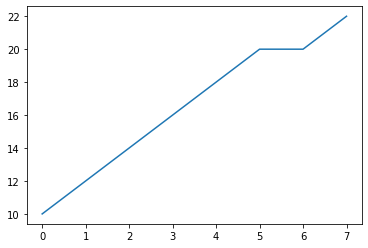

In [5]:
import matplotlib.pyplot as plt
plt.plot(data)

In [9]:
ARModel=AutoReg(data,lags=1)
ARModel_fit=ARModel.fit()

In [14]:
ypredicted=ARModel_fit.predict(8,10)

In [15]:
print(ypredicted)

[23.125      24.14453125 25.06848145]


In [16]:
predlist=ypredicted.tolist()

In [17]:
combinedlist=data+predlist

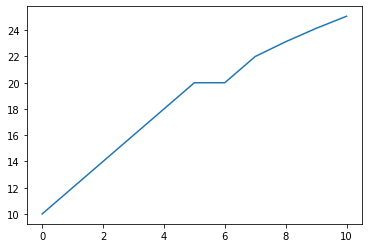

In [18]:
plt.plot(combinedlist)

# 2. Moving Average Model

In [21]:
# Suitable for data without trend and seasonality
from statsmodels.tsa.arima_model import ARMA

In [22]:
# fit model
MAModel=ARMA(data, order=(0,1)) # Model wih AR 0 and MA 1

In [24]:
MAModel_fit=MAModel.fit(disp=False)

In [26]:
y_predicted=MAModel_fit.predict(8,10)

In [27]:
y_predicted

array([20.51276533, 16.49884906, 16.49884906])

In [28]:
predlist=y_predicted.tolist()

In [29]:
combinedlist=data+predlist

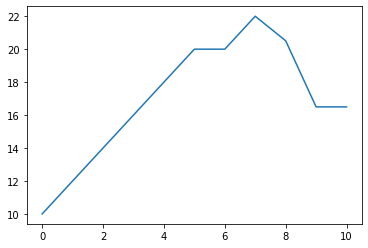

In [30]:
plt.plot(combinedlist)

# 3. Auto Regression moving Average (ARMA) Model

In [34]:
import pandas as pd


drug= pd.read_csv("drug1.csv", parse_dates=["date"], index_col="date")

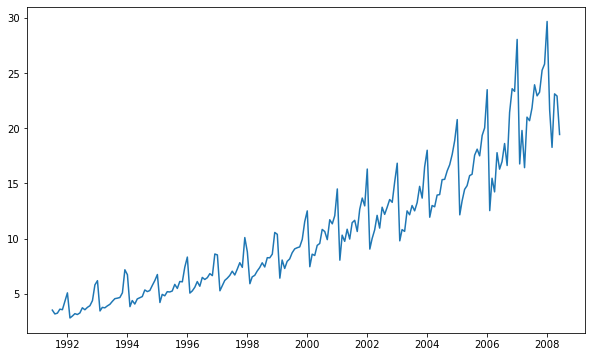

In [36]:
plt.rcParams.update({"figure.figsize": (10,6)})
plt.plot(drug["value"])

In [37]:
# ARMA Model

ARMAModel=ARMA(drug["value"], order=(1,1))

C:\Users\sagarw39\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [38]:
ARMAModel_fit=ARMAModel.fit(disp=False)

C:\Users\sagarw39\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:218: RuntimeWarning: divide by zero encountered in true_divide
  loglike, sigma2 = kalman_loglike.kalman_loglike_double(
C:\Users\sagarw39\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\sagarw39\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\sagarw39\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:690: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\sagarw39\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:690: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


In [40]:
#make prediction

ypredicted=ARMAModel_fit.predict(len(drug),len(drug)+2)

In [41]:
ypredicted

2008-07-01    21.237080
2008-08-01    21.181942
2008-09-01    21.127126
Freq: MS, dtype: float64

In [42]:
drug.tail(5)

,value
date,
2008-02-01,21.654285
2008-03-01,18.264945
2008-04-01,23.107677
2008-05-01,22.912510
2008-06-01,19.431740


# 4. Auto regression Integrated Moving Average

In [43]:
from statsmodels.tsa.arima_model import ARIMA

In [56]:
ARIMAModel=ARIMA(drug["value"], order=(1,1,1)) # p(AR),d(I),q(MA) of ARIMA
ARIMAModel_fit=ARMAModel.fit(disp=False)

In [57]:
#make prediction

ypredicted=ARIMAModel_fit.predict(len(drug),len(drug)+2 , typ="levels")

In [58]:
ypredicted

2008-07-01    21.237080
2008-08-01    21.181942
2008-09-01    21.127126
Freq: MS, dtype: float64